<a href="https://colab.research.google.com/github/Prakharava/ML-Data-Science/blob/main/jovac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/score.csv')

print(data.head())

df = pd.DataFrame(data)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [ ]:
fig = px.scatter(df, x='Hours', y='Scores', title='Study Hours vs Scores', labels={'Hours': 'Hours Studied', 'Scores': 'Scores Obtained'})
fig.show()

In [ ]:
X = df[['Hours']].values
y = df['Scores'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [ ]:
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average R-squared Score: {np.mean(cv_scores)}")

Cross-Validation R-squared Scores: [0.54971008 0.95901532 0.87721205 0.63164104 0.95923907]
Average R-squared Score: 0.7953635134250876


In [ ]:
print(f"Intercept (β0): {model.intercept_}")
print(f"Slope (β1): {model.coef_[0]}")

Intercept (β0): 2.826892353899737
Slope (β1): 9.682078154455697


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Scores:\n", df_pred)


Actual vs Predicted Scores:
    Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


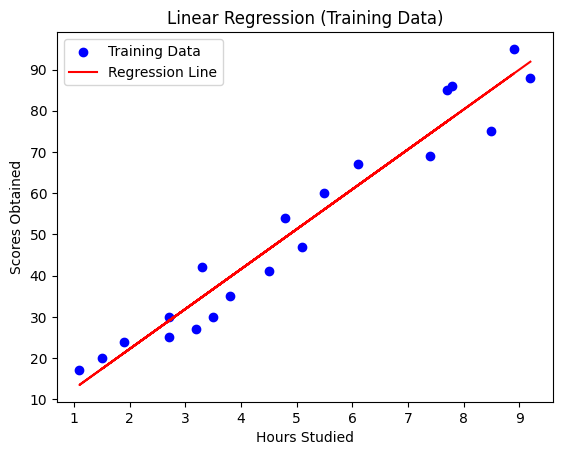

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('Linear Regression (Training Data)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 18.94
R-squared: 0.9678
